# Inferential Statistics:
    
Are there variables that are particularly significant in terms of explaining the answer to your project question?

Variables such as price of the house, number of bedrooms, bathrooms, square footage, location (zipcode) of a property. All of these factor into the purchase price of a home. By exploring how these variables affect the price of a property, we will be able to better answer the project question to help homebuyers make more confident offers. 

Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

There appears to be a strong correlation between average price and location of a property. The location of the property is the independent variable and the price of the home is the dependent variable. From the data visualizations that we have done, it appears that the closer the property is to Seattle metropolitan area, the higher the value of the home. This suggests that homebuyers are willing to pay a higher premium for convenience to the larger city for work, tourism, restaurants etc. 



In [ ]:
# Looking at filtering of cheap houses vs. expensive houses
# From there, filter down further. Cheap houses? What zipcodes are most popular? 
# Most expensive zipcodes?
# 98039 

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geopandas as gpd

In [56]:
# Importing the dataframe
df = pd.read_csv('C:/Users/jwhoj/Desktop/Capstone_1/KC_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count
print(count_row)
print(count_col)

21613
21


In [41]:
# How many houses are in each zipcode?
df['zipcode'].value_counts().head(10)

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
Name: zipcode, dtype: int64

In [58]:
# Calculate mean of prices in King County
np.mean(df['price'])

540182.1587933188

In [42]:
# Create dataframe of more affordable housing < 500k
cheap = df[(df['price'] < 500000) & 
                                           (df['price'] > 0) ]

In [45]:
# Mean of more affordable houses 
np.mean(cheap['price'])

338387.4663926499

In [47]:
cheap['zipcode'].value_counts().head(10)

98042    524
98038    518
98023    477
98133    432
98058    418
98118    393
98034    378
98155    364
98001    347
98092    325
Name: zipcode, dtype: int64

In [25]:
# Create dataframe of more expensive housing > 500k
expensive = df[(df['price'] > 500000)]

In [27]:
expensive.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


# Pearson Correlation

In order to test correlation between average property price & location
We must conduct a hypothesis test

Null hypothesis: King county listings have the same mean price in each zip code. 
    
Alternative hypothesis: King county listings do not have the same mean price in each zip code. 

In [48]:
# Compute the pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix
    matrix = np.corrcoef(x, y)

    # Return entry [0,1]
    return matrix[0,1]

In [49]:
# Compute observed correlation
price = np.array(df[df['price']>0]['price'])
zipcode = np.array(df[df['price']>0]['zipcode'])
r_obs = pearson_r(zipcode, price)
print('The observed correlation is', r_obs)

The observed correlation is -0.05316819852916175


In [51]:
# Initialize permutation replicates
perm_rep = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute readmission rate
    perm_readmission = np.random.permutation(zipcode)

    # Compute Pearson correlation
    perm_rep[i] = pearson_r(perm_readmission, price)

# Compute p-value
p = np.sum(perm_rep < r_obs) / len(perm_rep)

# Print
alpha = 0.01
print('p-value:', '%.2f' %p)
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

p-value: 0.00
Reject null hypothesis


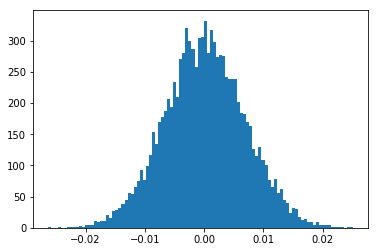

In [53]:
# Plot histogram of the correlation derived from the permutation replicates
plt.hist(perm_rep, bins=100)
plt.show()

In [55]:
from scipy import stats
mean_correlation = np.mean(perm_rep)
std_correlation = np.std(perm_rep)
interval = stats.norm.interval(0.99, loc=mean_correlation, scale=std_correlation)
print('For significance level α  = 0.01, the 99% confidence interval of the correlation efficient is', interval)

For significance level α  = 0.01, the 99% confidence interval of the correlation efficient is (-0.017376812656229552, 0.01766896799684194)


As the testing above shows, the observed correlation is -0.05316819852916175 which is lower than the p-value of 0.00 The correlation coefficient should also be within the confidence interval and it is beyond that of: (-0.017376812656229552, 0.01766896799684194). We can also see this visually from the above histogram.

This means that we reject the null hypothesis and that there is statistical significance between price of a property and location. This coincides with the possibility that properties closer to 
convenience cities are more expensive.

In [59]:
price = (df['price'])

# Frequentist tests

Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic?

We should use the t-test because the sample size is 10 (n < 30). We generally use z-tests when we have a large sample size (n > 30), when we know the standard deviation, when samples are drawn at random, and when the samples are taken from an independent population. Alpha level: 0.05


In [84]:
sample = np.random.choice(price, size=10)
sample

array([ 735000.,  488000.,  217000.,  385000., 1350000.,  554000.,
        300000., 2180000.,  526000.,  750000.])

In [85]:
stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=3.980112534667035, pvalue=0.0032052535375350962)

In [86]:
# Calculate the t-score by using the formula t=(x̄-μ)/(s/sqrt(n))
t = ((np.mean(sample))-98.6)/(np.std(sample)/np.sqrt(len(sample)))
print ('t-statistic is', t )

t-statistic is 4.1954069844445705


In [87]:
# Calculate the z statistic 
from statsmodels.stats.weightstats import ztest
z = ztest(sample,value=98.6)
print('z-statistic is', z)

z-statistic is (3.980112534667035, 6.888265228396535e-05)


T-test p-value: 0.004043214061902998
    
Z-test p-value: 0.00012945451906343078
    
In both tests, the p-values are below alpha value 0.05, so we reject the null hypothesis. 
This suggests that the sample size of 10 mean price of homes does not differ significantly from the population mean price of homes. 